In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo3/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo3/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,1.000000,0,,0,,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.800000,0,,0,,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.400000,0,,0,,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.600000,0,,0,,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

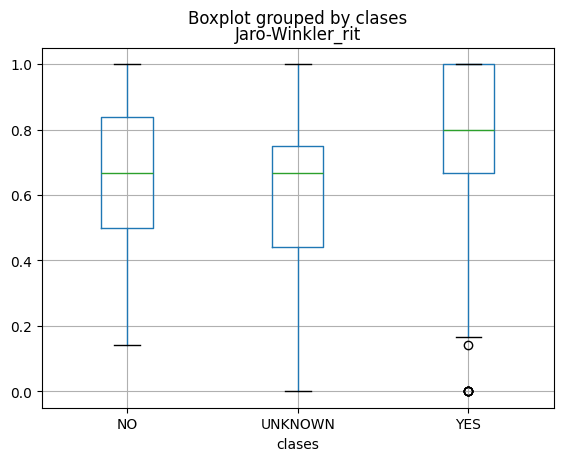

In [4]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,1.000000,0,,0,,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.800000,0,,0,,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.400000,0,,0,,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.600000,0,,0,,NO


In [6]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.800000,0,,0,,YES
16,1.461592,1.411314,2.151,1.546,3.951479,0.005108,0.234625,1,0.062500,1,7,1,16,0.857143,0,,0,,YES
25,1.858186,1.464642,2.498,1.329,3.887436,0.004578,0.291467,0,0.030303,0,4,1,33,0.750000,0,,0,,YES
27,-0.053825,1.481927,2.117,1.335,3.875875,0.003966,0.090035,0,0.076923,0,4,1,13,0.250000,0,,0,,YES
38,1.185824,1.431003,1.368,1.352,3.744154,0.003230,0.374629,1,0.076923,0,5,1,13,0.800000,0,,0,,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,1.762087,1.446709,2.241,1.850,4.036491,0.007515,0.419669,0,0.058824,0,4,1,17,0.500000,0,,0,,YES
758,0.842611,1.459464,2.034,1.868,3.911061,0.002989,0.388411,2,0.052632,0,11,1,19,1.000000,0,,1,sell,YES
772,0.959725,1.453204,2.232,1.677,3.946730,0.003056,0.219934,0,0.062500,0,7,1,16,0.857143,0,,0,,YES
791,2.019526,1.452324,2.180,2.017,3.949004,0.003593,0.378576,1,0.055556,0,6,1,18,0.833333,1,make,0,,YES


In [7]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'clases'],
      dtype='object')

In [8]:
train=train.drop(["verbT","verbH"],axis=1)

In [9]:
#train = train[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,0,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,0,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,1.000000,0,0,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,0,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.800000,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.400000,0,0,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,0,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,0,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.600000,0,0,NO


In [10]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [11]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [12]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH
sumas,1.000000,0.463790,0.166278,0.841878,0.768187,0.378215,0.863564,0.058507,0.311575,0.204771,0.074734,0.448226,0.201148,-0.191043,0.032953,0.053986
distancias,0.463790,1.000000,-0.054728,0.669953,0.661513,0.440013,0.530751,0.276287,0.885421,0.181300,0.378962,0.997710,-0.024987,-0.400287,-0.033385,-0.011639
entropia_total,0.166278,-0.054728,1.000000,0.131031,0.068330,0.038487,0.134315,0.020233,-0.043178,-0.019729,0.124274,-0.070915,-0.033983,0.071569,0.073999,0.004923
entropias,0.841878,0.669953,0.131031,1.000000,0.957405,0.537860,0.893027,0.166513,0.590986,0.196954,0.122150,0.652494,-0.032416,-0.321462,-0.018137,0.065171
mutinf,0.768187,0.661513,0.068330,0.957405,1.000000,0.543589,0.834276,0.179586,0.573677,0.163090,0.113456,0.640951,-0.019715,-0.317921,-0.019929,0.051477
mearts,0.378215,0.440013,0.038487,0.537860,0.543589,1.000000,0.424628,0.113108,0.426190,0.114434,0.104859,0.446803,-0.043418,-0.229476,-0.030964,0.007730
max_info,0.863564,0.530751,0.134315,0.893027,0.834276,0.424628,1.000000,0.099940,0.450657,0.239724,0.065060,0.515429,0.002780,-0.267074,-0.005468,0.082182
list_comp,0.058507,0.276287,0.020233,0.166513,0.179586,0.113108,0.099940,1.000000,0.256173,0.024793,0.297037,0.274743,-0.099317,-0.119877,0.016221,0.002041
diferencias,0.311575,0.885421,-0.043178,0.590986,0.573677,0.426190,0.450657,0.256173,1.000000,0.185114,0.322844,0.888293,-0.274778,-0.406426,-0.058198,-0.012964
list_incomp,0.204771,0.181300,-0.019729,0.196954,0.163090,0.114434,0.239724,0.024793,0.185114,1.000000,0.065502,0.182574,-0.021058,-0.003955,-0.001632,0.076916


<Axes: >

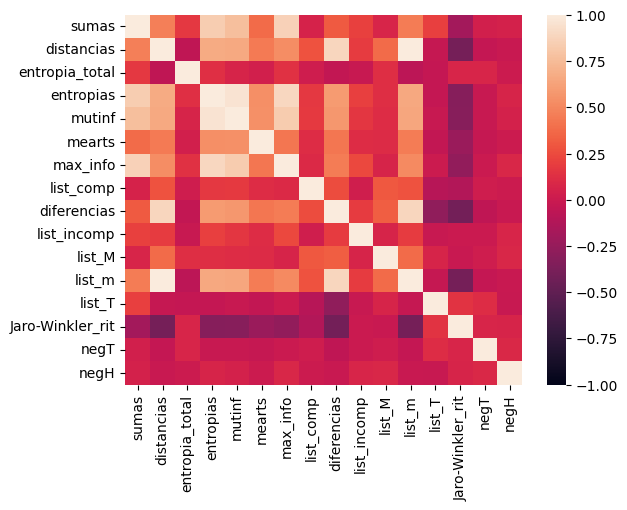

In [13]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [14]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH
sumas,1.000000,0.463790,0.166278,0.841878,0.768187,0.378215,0.863564,0.058507,0.311575,0.204771,0.074734,0.448226,0.201148,-0.191043,0.032953,0.053986
distancias,0.463790,1.000000,-0.054728,0.669953,0.661513,0.440013,0.530751,0.276287,0.885421,0.181300,0.378962,0.997710,-0.024987,-0.400287,-0.033385,-0.011639
entropia_total,0.166278,-0.054728,1.000000,0.131031,0.068330,0.038487,0.134315,0.020233,-0.043178,-0.019729,0.124274,-0.070915,-0.033983,0.071569,0.073999,0.004923
entropias,0.841878,0.669953,0.131031,1.000000,0.957405,0.537860,0.893027,0.166513,0.590986,0.196954,0.122150,0.652494,-0.032416,-0.321462,-0.018137,0.065171
mutinf,0.768187,0.661513,0.068330,0.957405,1.000000,0.543589,0.834276,0.179586,0.573677,0.163090,0.113456,0.640951,-0.019715,-0.317921,-0.019929,0.051477
mearts,0.378215,0.440013,0.038487,0.537860,0.543589,1.000000,0.424628,0.113108,0.426190,0.114434,0.104859,0.446803,-0.043418,-0.229476,-0.030964,0.007730
max_info,0.863564,0.530751,0.134315,0.893027,0.834276,0.424628,1.000000,0.099940,0.450657,0.239724,0.065060,0.515429,0.002780,-0.267074,-0.005468,0.082182
list_comp,0.058507,0.276287,0.020233,0.166513,0.179586,0.113108,0.099940,1.000000,0.256173,0.024793,0.297037,0.274743,-0.099317,-0.119877,0.016221,0.002041
diferencias,0.311575,0.885421,-0.043178,0.590986,0.573677,0.426190,0.450657,0.256173,1.000000,0.185114,0.322844,0.888293,-0.274778,-0.406426,-0.058198,-0.012964
list_incomp,0.204771,0.181300,-0.019729,0.196954,0.163090,0.114434,0.239724,0.024793,0.185114,1.000000,0.065502,0.182574,-0.021058,-0.003955,-0.001632,0.076916


In [15]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [16]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    elif i == "UNKNOWN":
        y_train.append(2)
    else:
        y_train.append(0)

In [17]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

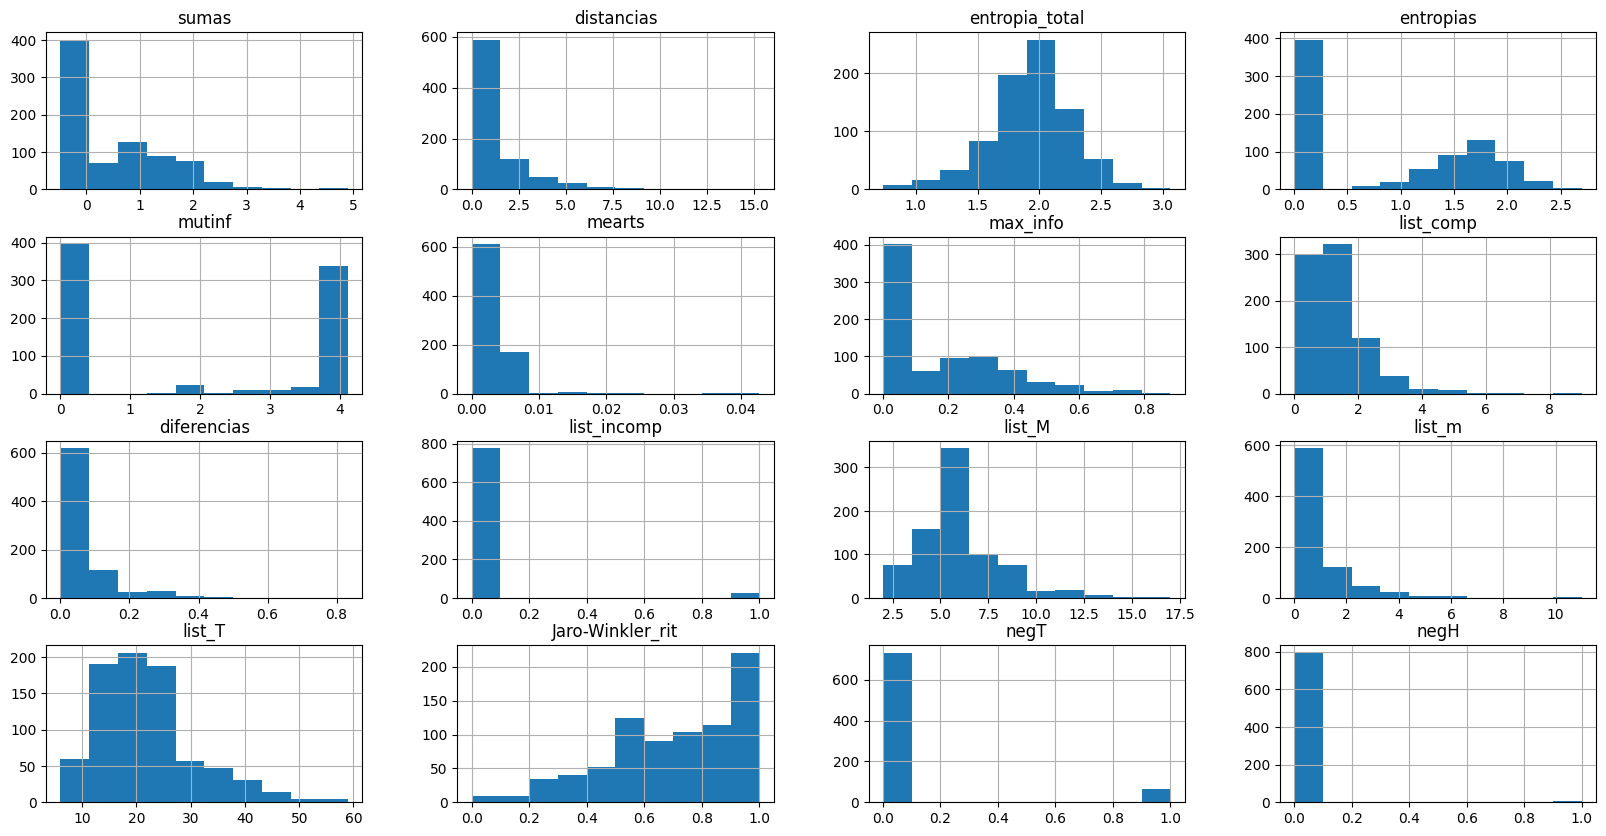

In [18]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [19]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo3/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo3/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [20]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,,0,,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,,0,,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,,0,,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,,0,,YES
4,0.000000,0.000000,1.691,0.000,0.000000,0.000000,0.000000,1,0.000000,0,4,0,20,0.000000,0,,0,,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,rush,0,,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.833333,0,,0,,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.333333,0,,0,,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.750000,0,,0,,UNKNOWN


In [21]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [22]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,YES
4,0.000000,0.000000,1.691,0.000,0.000000,0.000000,0.000000,1,0.000000,0,4,0,20,0.000000,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,0,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.833333,0,0,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.333333,0,0,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.750000,0,0,UNKNOWN


In [23]:
test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

(48, 17)

In [24]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [25]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    elif i == "UNKNOWN":
        y_test.append(2)
    else:
        y_test.append(0)

In [26]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [27]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.32244365, ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.55112708, ..., 1.        , 0.        ,
        0.        ],
       [0.38349007, 0.09517234, 0.640967  , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.48709572, ..., 0.66666667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.54459327, ..., 0.6       , 0.        ,
        0.        ],
       [0.32323126, 0.09650245, 0.61548514, ..., 1.        , 0.        ,
        0.        ]])

In [28]:
X_train.shape

(800, 16)

In [29]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [30]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
model.decision_function(X_train)

array([[-0.5149254 ,  0.65104605, -0.13612066],
       [-1.05622161,  1.2516654 , -0.19544379],
       [-1.45119641,  0.88727996,  0.56391645],
       ...,
       [-0.62343577,  0.89915346, -0.27571768],
       [-0.6051609 ,  0.96841309, -0.36325219],
       [-1.38773551,  0.87438083,  0.51335468]])

In [32]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH'],
      dtype='object')

In [33]:
model.classes_

array([0, 1, 2])

In [34]:
model.coef_[0]

array([-0.05610652, -0.14942377, -0.20879937, -0.28038584, -0.15317481,
       -0.59297455,  0.16201007, -1.42728642, -0.13775405,  0.63650953,
        0.2961274 , -0.05829486, -0.81691451, -0.55469758,  0.56416836,
        1.11402588])

In [35]:
coeficientes=model.coef_[0]

In [36]:
coeficientes

array([-0.05610652, -0.14942377, -0.20879937, -0.28038584, -0.15317481,
       -0.59297455,  0.16201007, -1.42728642, -0.13775405,  0.63650953,
        0.2961274 , -0.05829486, -0.81691451, -0.55469758,  0.56416836,
        1.11402588])

In [37]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  15 negH 7 list_comp


In [38]:

n_columns=train.shape[1]-1

In [39]:
n_columns

16

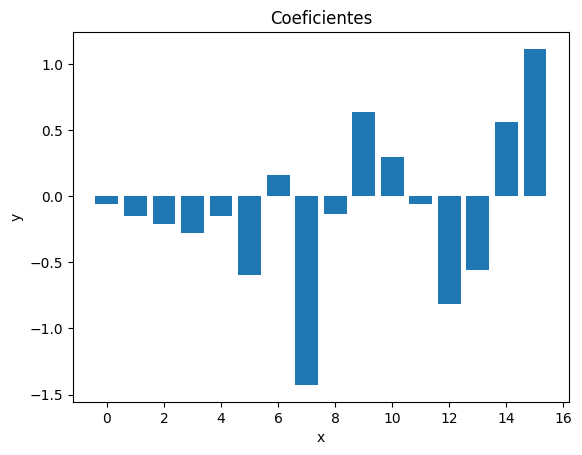

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [41]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.75524712, ..., 0.4       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.70040623, ..., 0.8       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.59749492, ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.61882194, ..., 0.33333333, 0.        ,
        0.        ],
       [0.06309664, 0.14040234, 0.59817197, ..., 0.75      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.859174  , ..., 0.875     , 0.        ,
        0.        ]])

In [42]:
X_test.shape

(800, 16)

In [43]:
predictions = model.predict(X_test)

In [44]:
predictions

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,

In [45]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,clases,predicciones
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,YES,1
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,YES,1
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,YES,1
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,YES,1
4,0.000000,0.000000,1.691,0.000,0.000000,0.000000,0.000000,1,0.000000,0,4,0,20,0.000000,0,0,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,0,YES,1
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.833333,0,0,NO,1
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.333333,0,0,UNKNOWN,1
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.750000,0,0,UNKNOWN,2


In [46]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,clases,predicciones
288,1.164592,2.886629,2.179,1.833,3.655588,0.004999,0.513491,0,0.200000,0,5,2,10,0.80,1,1,YES,0
715,1.178411,2.877922,2.350,2.028,3.925121,0.002839,0.521536,0,0.181818,0,8,2,11,0.75,0,1,YES,0


In [47]:
print(confusion_matrix(y_test, predictions))

[[  3  55  14]
 [  2 307 101]
 [  2 125 191]]


In [50]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.63
precision:  0.61
recall 0.63
f1_score:  0.6
matthews_score:  0.31


In [51]:
X_train.shape

(800, 16)

In [52]:
X_test.shape

(800, 16)

In [53]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [54]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [56]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s

Logistic Regression Acurracy:: 0.660000 (0.114324)
Logistic Regression Precision:: 0.600000 (0.162957)
Logistic Regression Recall:: 0.660000 (0.114324)
Logistic Regression F1-score:: 0.610000 (0.148112)


In [57]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.320000 (0.232328)


In [58]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [59]:
#linear_model

In [60]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.43      0.04      0.08        72
           1       0.63      0.75      0.68       410
           2       0.62      0.60      0.61       318

    accuracy                           0.63       800
   macro avg       0.56      0.46      0.46       800
weighted avg       0.61      0.63      0.60       800



In [63]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [64]:
test.columns[:-1]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'clases'],
      dtype='object')

In [65]:
explainer.expected_value

array([-0.98187008,  0.53878463,  0.44308545])

In [66]:
X_test

array([[0.        , 0.        , 0.75524712, ..., 0.4       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.70040623, ..., 0.8       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.59749492, ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.61882194, ..., 0.33333333, 0.        ,
        0.        ],
       [0.06309664, 0.14040234, 0.59817197, ..., 0.75      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.859174  , ..., 0.875     , 0.        ,
        0.        ]])

In [67]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [68]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.         0.44482058 0.         0.         0.
 0.         0.16666667 0.         0.         0.29411765 0.
 0.39285714 1.         0.         0.        ] 2 1


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

[0.         0.         0.57684496 0.         0.         0.
 0.         0.         0.         0.         0.29411765 0.
 0.42857143 1.         0.         0.        ]


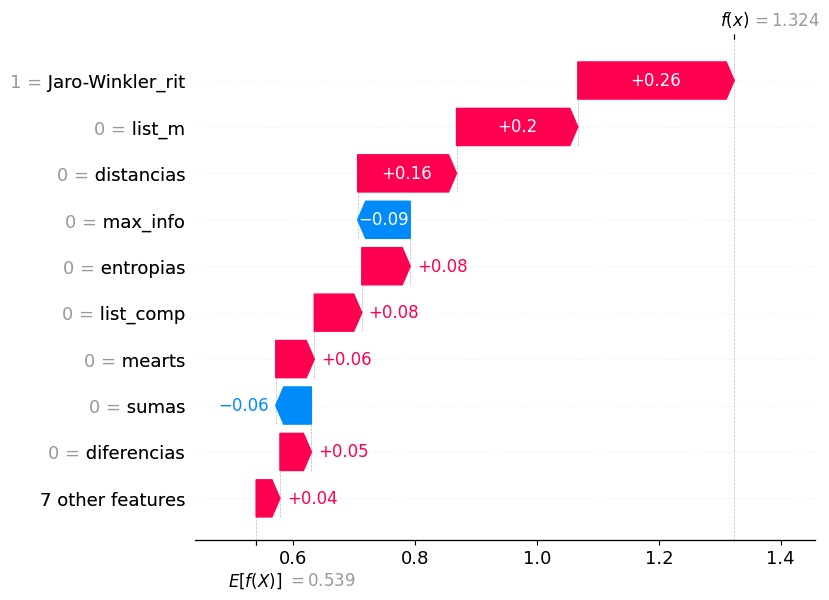

In [69]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

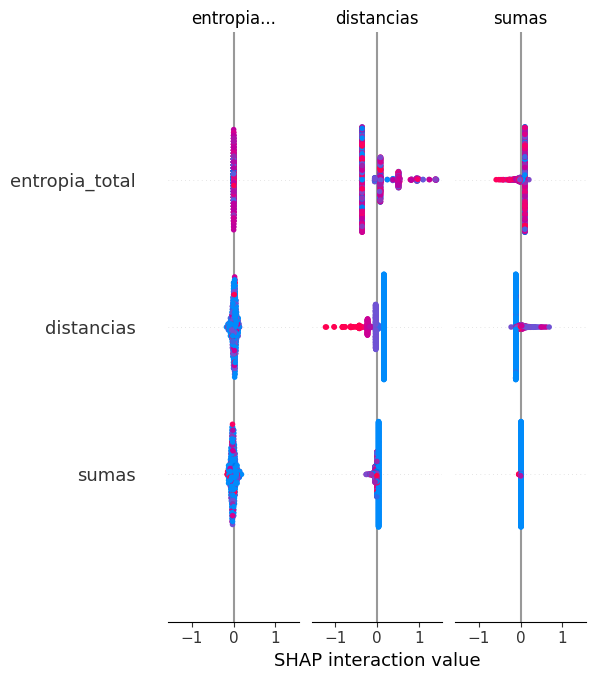

In [70]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

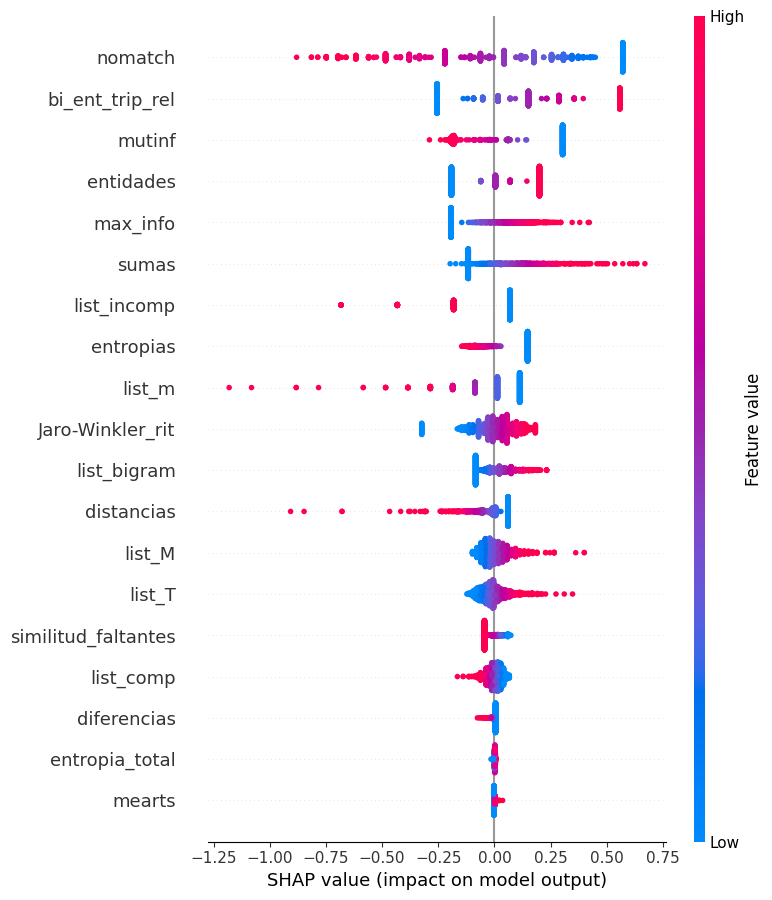

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

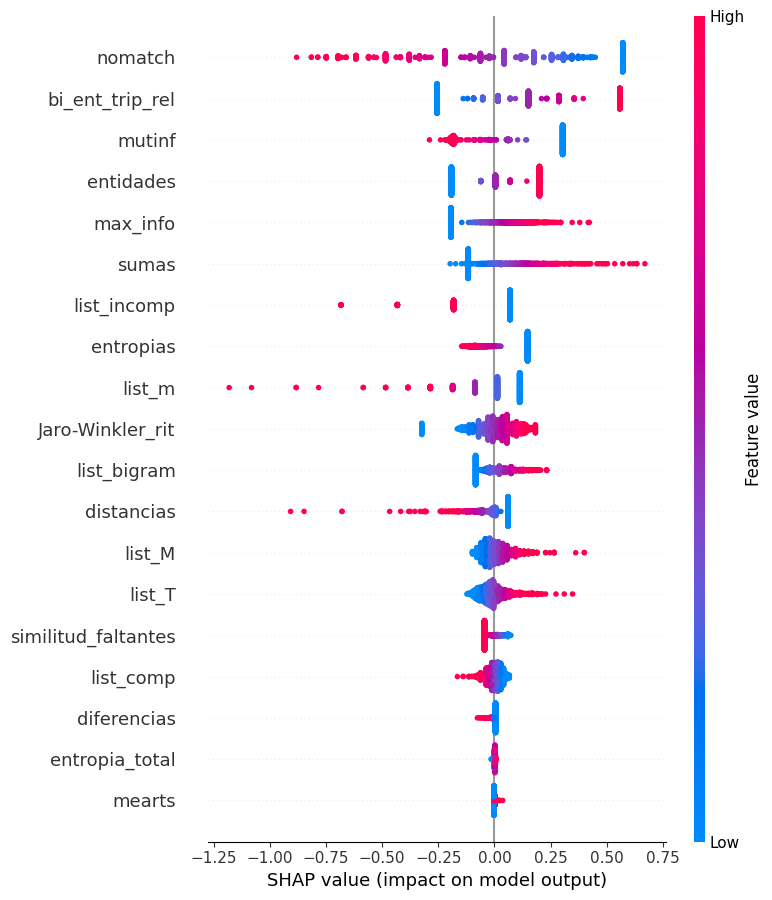

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

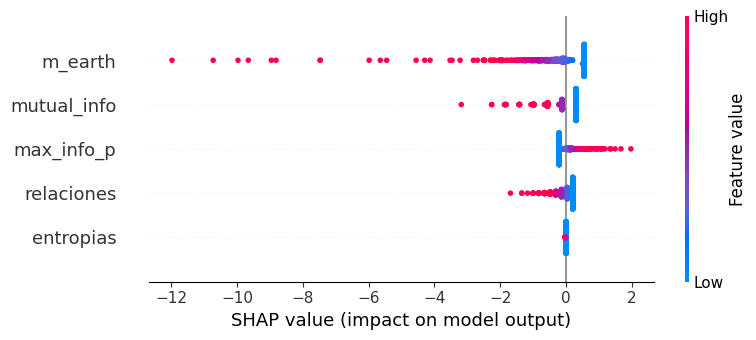

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


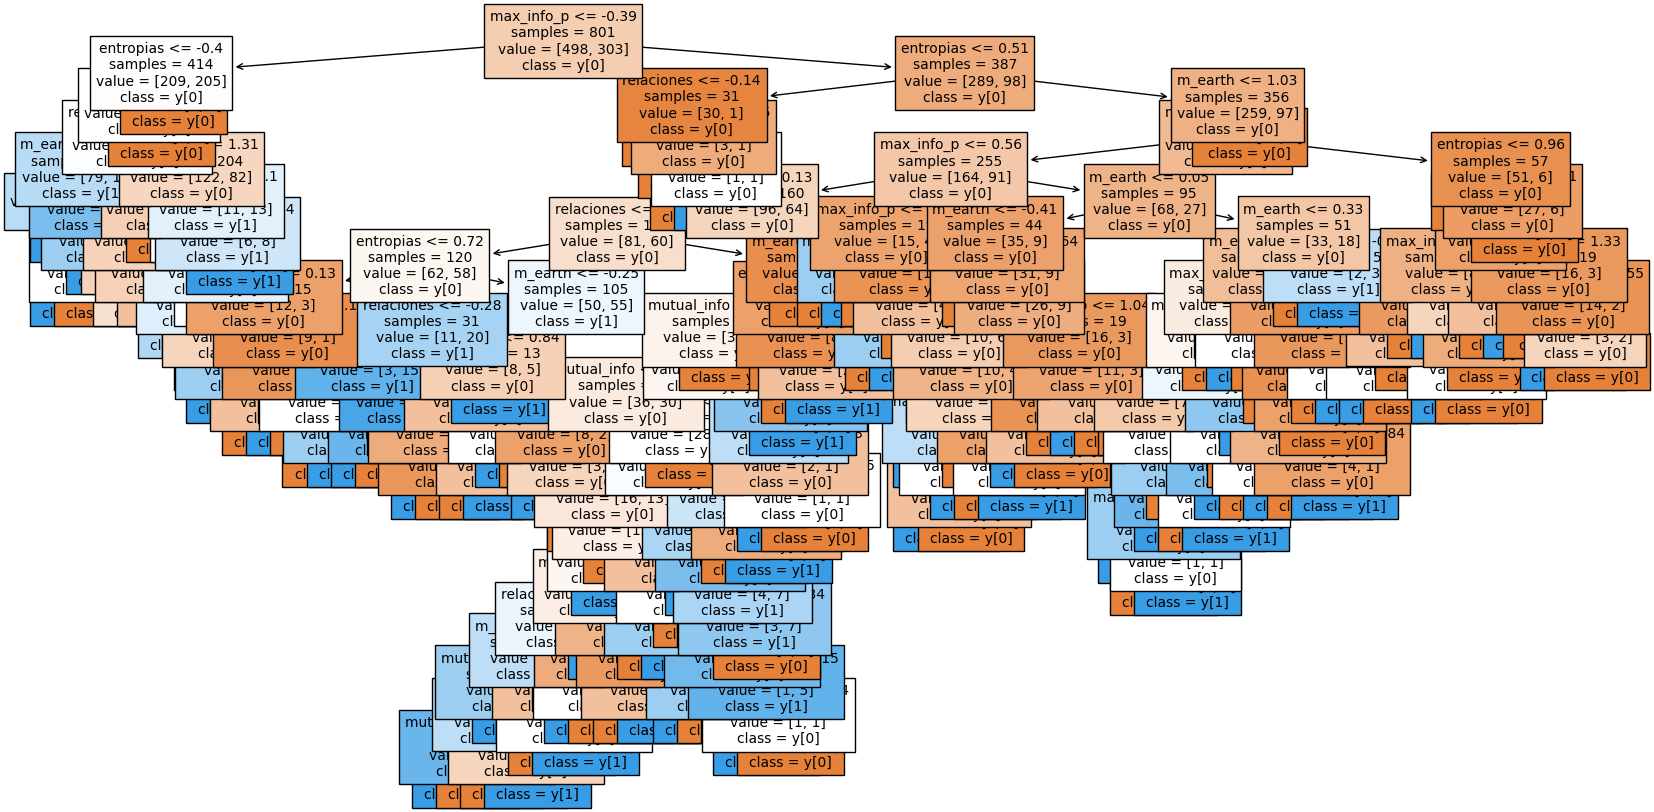

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )